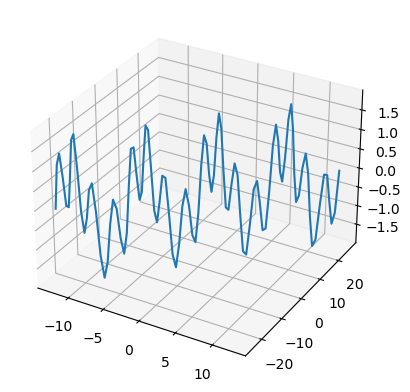

In [9]:
from mpl_toolkits import mplot3d
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4*np.pi,4*np.pi,100)
y = 2*x + np.cos(x)
#y = 2*np.sin(x) + np.sin(4*x) + 3*np.cos(x) + np.sin(2*x) + np.sin(x**2) - np.cos(6*x)
z = np.sin(x) + np.sin(4*x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)

plt.show()


